In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CHANNELS_TITLES = ["Red Channel", "Green Channel", "Blue Channel"]
def plot(images, labels):
    imgs_count = len(images)
    intensities = np.array(range(256))

    plt.figure(figsize=(14,14))
    for i in range(imgs_count):
        plt.subplot(imgs_count, 4, 1 + i * 4)
        plt.imshow(images[i])
        plt.title(labels[i])
        for c in range(3):
            plt.subplot(imgs_count, 4, i * 4 + c + 2)
            plt.bar(intensities, cv2.calcHist([images[i]], [c], None, [256], [0, 256])[:, 0], width = 5)
            plt.title(CHANNELS_TITLES[c])
            plt.xlabel('intensity')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()

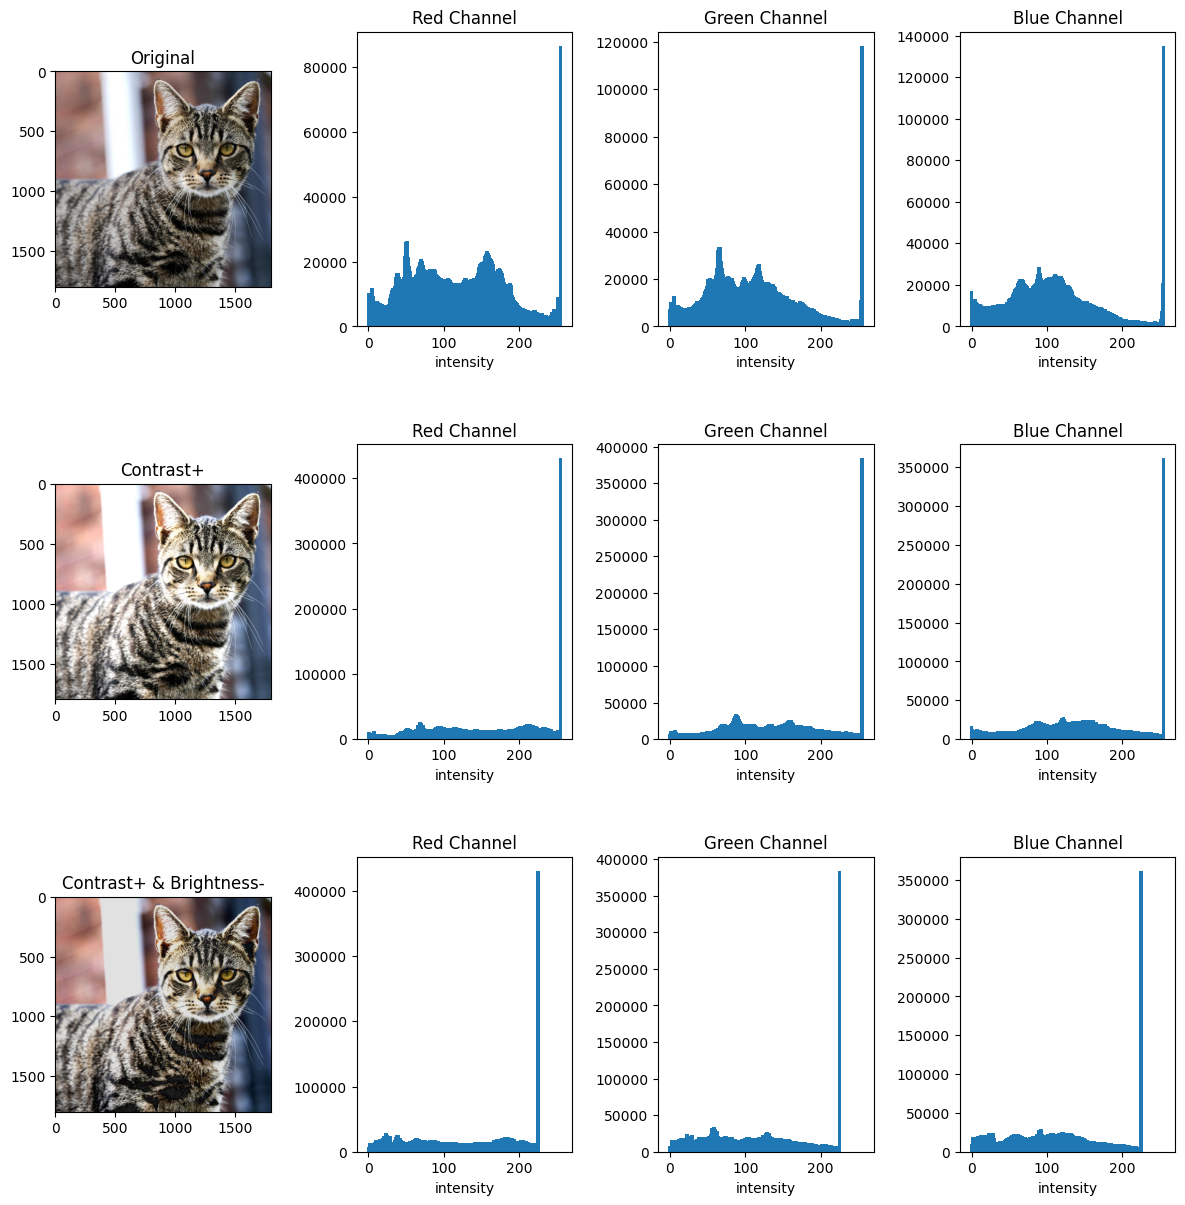

In [3]:
img_bgr = cv2.imread("cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_contrast = cv2.convertScaleAbs(img_rgb, alpha=1.35, beta=0)
img_contrast_bri = cv2.convertScaleAbs(img_contrast, alpha=1, beta=-30)
plot(
    [img_rgb, img_contrast, img_contrast_bri], 
    [
        "Original",
        "Contrast+",
        "Contrast+ & Brightness-"
    ]
)